In [38]:
import os

import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns

plt.style.use('seaborn-whitegrid')
import itertools

In [4]:
def open_file():
    with open('ddata_min.pickle', 'rb') as f:
        f_data = pickle.load(f)
    return f_data

In [5]:
df = open_file()

In [15]:
df_btc = df[df.permno == 'BTC']

In [16]:
df_300min_tvol = df_btc.tvol.rolling(window=300).sum()
df_prc_mul_tvol = (df_btc.prc*df_btc.tvol).rolling(window=300).sum()

In [17]:
df_btc['vwap'] = df_prc_mul_tvol / df_300min_tvol

<ipython-input-17-8cee3d5ee920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['vwap'] = df_prc_mul_tvol / df_300min_tvol


In [18]:
df_btc

,permno,prc,tvol,mcap,vwap
date,,,,,
2019-09-08 17:57:00,BTC,10000.00,0.001,1.884885e+11,NaN
2019-09-08 17:58:00,BTC,10000.00,0.000,1.884885e+11,NaN
2019-09-08 17:59:00,BTC,10000.00,0.001,1.884885e+11,NaN
2019-09-08 18:00:00,BTC,10000.00,0.000,1.884885e+11,NaN
2019-09-08 18:01:00,BTC,10000.00,0.000,1.884885e+11,NaN
...,...,...,...,...,...
2021-06-29 00:55:00,BTC,34964.05,446.247,6.494617e+11,34571.713516
2021-06-29 00:56:00,BTC,34917.94,288.977,6.494617e+11,34572.870055
2021-06-29 00:57:00,BTC,34948.84,199.008,6.494617e+11,34573.843550


In [22]:
period = 300
U = np.where(df_btc.prc.diff(1) > 0, df_btc.prc.diff(1), 0)
D = np.where(df_btc.prc.diff(1) < 0, df_btc.prc.diff(1)*(-1), 0)
AU = pd.DataFrame(U, index=df_btc.index).rolling(window=period).mean()
AD = pd.DataFrame(D, index=df_btc.index).rolling(window=period).mean()
RSI = AU / (AD+AU) * 100
df_btc['RSI'] = RSI

<ipython-input-22-f4b9105b329e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['RSI'] = RSI


In [23]:
df_btc

,permno,prc,tvol,mcap,vwap,RSI
date,,,,,,
2019-09-08 17:57:00,BTC,10000.00,0.001,1.884885e+11,NaN,NaN
2019-09-08 17:58:00,BTC,10000.00,0.000,1.884885e+11,NaN,NaN
2019-09-08 17:59:00,BTC,10000.00,0.001,1.884885e+11,NaN,NaN
2019-09-08 18:00:00,BTC,10000.00,0.000,1.884885e+11,NaN,NaN
2019-09-08 18:01:00,BTC,10000.00,0.000,1.884885e+11,NaN,NaN
...,...,...,...,...,...,...
2021-06-29 00:55:00,BTC,34964.05,446.247,6.494617e+11,34571.713516,53.208971
2021-06-29 00:56:00,BTC,34917.94,288.977,6.494617e+11,34572.870055,52.766937
2021-06-29 00:57:00,BTC,34948.84,199.008,6.494617e+11,34573.843550,52.664768


In [30]:
df_btc.drop(['mcap'], axis=1, inplace=True)

/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
diff_data = df_btc.prc - df_btc.vwap

In [55]:
diff_data = diff_data.dropna()

-7735.348437429431

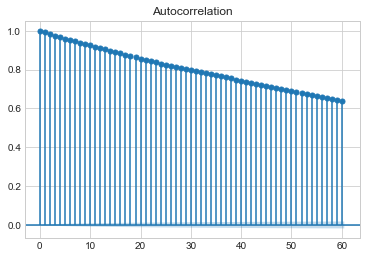

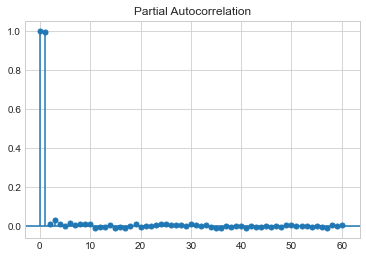

In [56]:
plot_acf(diff_data)
plot_pacf(diff_data);

In [62]:
second_diff_data = diff_data.diff()
second_diff_data = second_diff_data.dropna()

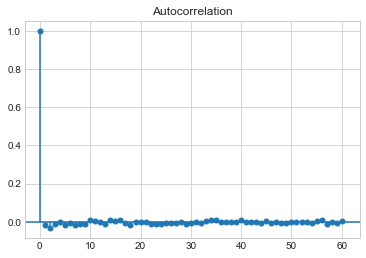

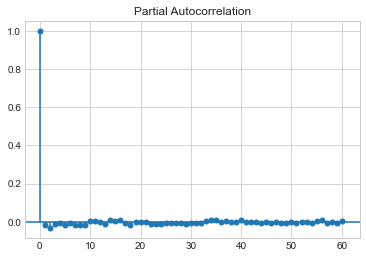

In [63]:
plot_acf(second_diff_data)
plot_pacf(second_diff_data);

In [40]:
diff_prc = df_btc.copy()
diff_prc = diff_prc.prc.diff()
diff_prc = diff_prc.dropna()

In [ ]:
auto_arima_model = auto_arima(second_diff_data, start_p=1, start_q=1,
                             max_p=3, max_q=3, seasonal=False,
                             d=1,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10211628.078, Time=16.88 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=417.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=539.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=787.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9949625.596, Time=22.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=770.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=357.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=599.70 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9829690.379, Time=25.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=354.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=419.97 sec
